# Freeswitch CDR Analysis using Pandas 

## Altanai Bisht 
( abisht@seattleu.edu
altanai.telecom.com)

License GPL 3

In [2]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

ImportError: PyArrow >= 1.0.0 must be installed; however, it was not found.

## Call Record

FreeSWITCH CDRs stored in /usr/local/freeswitch/log/cdr-csv/Master.csv
ref : https://freeswitch.org/confluence/display/FREESWITCH/CDR
and https://freeswitch.org/confluence/display/FREESWITCH/mod_cdr_csv

In [2]:
# logfile = "/fslogs/*.log"
# fslogs = sc.textFile("hdfs://localhost:9000/"+logfile)

from pyspark import SparkFiles
# spark.sparkContext.addFile(url)
cdrpath= "C:\\Users\\abisht\\FS_logs\\*.csv"
path="C:\\Users\\abisht\\VoIPCallLogs_BigDataSet\\freeswitch\\*log"
df = spark.read.csv(SparkFiles.get("cdrpath"), header=False, inferSchema= True)

NameError: name 'spark' is not defined

In [27]:
# Filter : create an RDD containing only those lines that are requests for JPG files
# jpglogs = logs.filter(lambda x: ".jpg" in x)

# for line in jpglogs.take(5):
#     print(line)

In [ ]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row
import re

# This is the regex which is specific to Apache Access Logs parsing  Log formats 
# Example Apache log line:
# 127.0.0.1 - - [21/Jul/2014:9:55:27 -0800] "GET /home.html HTTP/1.1" 200 2048 
# 1:IP 2:client 3:user 4:date time          5:method 6:req 7:proto   8:respcode 9:size
APACHE_LOG_PATTERN = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(\S+) (\S+) (\S+)" (\d{3}) (\d+)'

# Example Freeswitch cdr-csv log line:
# "8001","8001","0046423112856","public","2020-06-13 00:58:52","2020-06-13 00:58:52","2020-06-13 00:58:53","1","1","USER_NOT_REGISTERED","f2b05a36-ace2-11ea-aa3b-153da8caf925","","","PCMU","PCMU"
# FS_LOG_PATTERN = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(\S+) (\S+) (\S+)" (\d{3}) (\d+)'


# The below function is modelled specific to Apache Access Logs Model, which can be modified as per needs to different Logs format
# Returns a dictionary containing the parts of the Apache Access Log.
# def parse_apache_log_line(logline):
#     match = re.search(FS_LOG_PATTERN, logline)
#     if match is None:
#         raise Error("Invalid logline: %s" % logline)
#     return Row(
#         ip_address    = match.group(1),
#         client_identd = match.group(2),
#         user_id       = match.group(3),
#         date = (match.group(4)[:-6]).split(":", 1)[0],
#         time = (match.group(4)[:-6]).split(":", 1)[1],
#         method        = match.group(5),
#         endpoint      = match.group(6),
#         protocol      = match.group(7),
#         response_code = int(match.group(8)),
#         content_size  = int(match.group(9))
#     )

In [28]:
df.head(2)

[Row(_c0='8001', _c1='8001', _c2='0046423112856', _c3='public', _c4='2020-06-13 00:58:52', _c5='2020-06-13 00:58:52', _c6='2020-06-13 00:58:53', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='f2b05a36-ace2-11ea-aa3b-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU'),
 Row(_c0='8001', _c1='8001', _c2='00046423112856', _c3='public', _c4='2020-06-13 00:59:51', _c5='2020-06-13 00:59:51', _c6='2020-06-13 00:59:52', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='15d78f5c-ace3-11ea-aa45-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU')]

In [29]:
# df2 = spark.createDataFrame(df)
# TypeError: data is already a DataFrame

In [30]:
df.show(5)
df.printSchema()

+----+----+---------------+------+-------------------+-------------------+-------------------+---+---+-------------------+--------------------+----+----+----+----+
| _c0| _c1|            _c2|   _c3|                _c4|                _c5|                _c6|_c7|_c8|                _c9|                _c10|_c11|_c12|_c13|_c14|
+----+----+---------------+------+-------------------+-------------------+-------------------+---+---+-------------------+--------------------+----+----+----+----+
|8001|8001|  0046423112856|public|2020-06-13 00:58:52|2020-06-13 00:58:52|2020-06-13 00:58:53|  1|  1|USER_NOT_REGISTERED|f2b05a36-ace2-11e...|null|null|PCMU|PCMU|
|8001|8001| 00046423112856|public|2020-06-13 00:59:51|2020-06-13 00:59:51|2020-06-13 00:59:52|  1|  1|USER_NOT_REGISTERED|15d78f5c-ace3-11e...|null|null|PCMU|PCMU|
|8001|8001|000046903433905|public|2020-06-13 01:00:13|2020-06-13 01:00:13|2020-06-13 01:00:14|  1|  1|USER_NOT_REGISTERED|22d77398-ace3-11e...|null|null|PCMU|PCMU|
|8001|8001|90004

In [ ]:
df.show(1, vertical=True)

**DataFrame.collect()** collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [3]:
# df.collect()

**Groupby** Group by call duartion 

In [36]:
df.groupby('_c7').avg().show()

+----+--------+
| _c7|avg(_c7)|
+----+--------+
|  12|    12.0|
|   1|     1.0|
|  13|    13.0|
|   6|     6.0|
|   3|     3.0|
|   5|     5.0|
|   9|     9.0|
|  17|    17.0|
|   4|     4.0|
|   8|     8.0|
|   7|     7.0|
|  10|    10.0|
|  29|    29.0|
|  32|    32.0|
|  11|    11.0|
|  33|    33.0|
|   2|     2.0|
|   0|     0.0|
|1025|  1025.0|
|  31|    31.0|
+----+--------+
only showing top 20 rows



## Transform to  Pandad Dataframe 

In [40]:
# spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df= df.toPandas()
df.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14
0,8001,8001,0046423112856,public,2020-06-13 00:58:52,2020-06-13 00:58:52,2020-06-13 00:58:53,1,1,USER_NOT_REGISTERED,f2b05a36-ace2-11ea-aa3b-153da8caf925,None,None,PCMU,PCMU
1,8001,8001,00046423112856,public,2020-06-13 00:59:51,2020-06-13 00:59:51,2020-06-13 00:59:52,1,1,USER_NOT_REGISTERED,15d78f5c-ace3-11ea-aa45-153da8caf925,None,None,PCMU,PCMU
2,8001,8001,000046903433905,public,2020-06-13 01:00:13,2020-06-13 01:00:13,2020-06-13 01:00:14,1,1,USER_NOT_REGISTERED,22d77398-ace3-11ea-aa4f-153da8caf925,None,None,PCMU,PCMU
3,8001,8001,900046184445688,public,2020-06-13 01:00:36,2020-06-13 01:00:36,2020-06-13 01:00:37,1,1,USER_NOT_REGISTERED,30e9979a-ace3-11ea-aa59-153da8caf925,None,None,PCMU,PCMU
4,8001,8001,90046423112856,public,2020-06-13 01:00:43,2020-06-13 01:00:43,2020-06-13 01:00:44,1,1,USER_NOT_REGISTERED,35075b78-ace3-11ea-aa63-153da8caf925,None,None,PCMU,PCMU


In [41]:
df.columns

Index(['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9',
       '_c10', '_c11', '_c12', '_c13', '_c14'],
      dtype='object')

In [ ]:
# df.select("_c4", "_", "c").describe().show()

In [51]:
df.rename(columns={
    "_c0": "caller_name", 
    "_c1": "caller_number", 
    "_c2": "destination_number",
    "_c3": "context", 
    "_c4": "start_timesatmp", 
    "_c5": "answer_timesatmp",
    "_c6": "end_timesatmp", 
    "_c7": "duration", 
    "_c8": "billsec",
    "_c9": "hangupcause", 
    "_c10": "callid", 
#     "_c11": "",
#     "_c12": "", 
#     "_c13": "", 
#     "_c14": "c"
}, errors="raise", inplace=True)

In [ ]:
# df.filter(df.a == 1).show()

In [52]:
df.head()

,caller_name,caller_number,destination_number,context,start_timesatmp,answer_timesatmp,end_timesatmp,duration,billsec,hangupcause,callid,_c11,_c12,_c13,_c14
0,8001,8001,0046423112856,public,2020-06-13 00:58:52,2020-06-13 00:58:52,2020-06-13 00:58:53,1,1,USER_NOT_REGISTERED,f2b05a36-ace2-11ea-aa3b-153da8caf925,None,None,PCMU,PCMU
1,8001,8001,00046423112856,public,2020-06-13 00:59:51,2020-06-13 00:59:51,2020-06-13 00:59:52,1,1,USER_NOT_REGISTERED,15d78f5c-ace3-11ea-aa45-153da8caf925,None,None,PCMU,PCMU
2,8001,8001,000046903433905,public,2020-06-13 01:00:13,2020-06-13 01:00:13,2020-06-13 01:00:14,1,1,USER_NOT_REGISTERED,22d77398-ace3-11ea-aa4f-153da8caf925,None,None,PCMU,PCMU
3,8001,8001,900046184445688,public,2020-06-13 01:00:36,2020-06-13 01:00:36,2020-06-13 01:00:37,1,1,USER_NOT_REGISTERED,30e9979a-ace3-11ea-aa59-153da8caf925,None,None,PCMU,PCMU
4,8001,8001,90046423112856,public,2020-06-13 01:00:43,2020-06-13 01:00:43,2020-06-13 01:00:44,1,1,USER_NOT_REGISTERED,35075b78-ace3-11ea-aa63-153da8caf925,None,None,PCMU,PCMU


## Plot call traffic on the network

<AxesSubplot:>

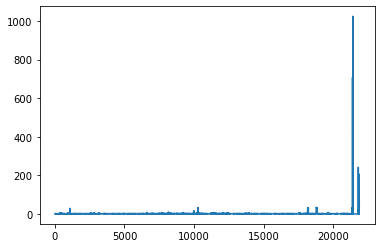

In [55]:
df["duration"].plot()

<AxesSubplot:>

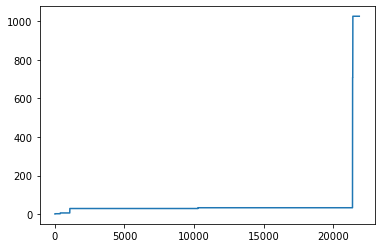

In [57]:
psser = df["duration"].cummax()
psser.plot()

## Processing Durations 

Calculating Ring Start

ring_start_time = progress_time + progress_media_time

PDD (post-dial delay) is the period of silence between the call starting and the call ringing, therefore for calls that ring:

pdd = ring_start_time - created_time

Calculating Call Duration
length_of_talk_time = hangup_time - answered_time

Calculating Ring Duration
if ( answered_time == 0 ) then
    length_of_phone_ringing = hangup_time - created_time
else
    length_of_phone_ringing = answered_time - created_time
end

## Output CSV 

In [ ]:
df.write.csv('processed_call_carbonfootprint.csv', header=True)
spark.read.csv('processed_call_carbonfootprint.csv', header=True).show()